In [15]:
## Data processing

In [1]:
# Importing libraries

3
1


To read file csv(excels,..), we can use Pandas library

In [16]:
import pandas as pd

data = pd.read_csv('train (1).csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

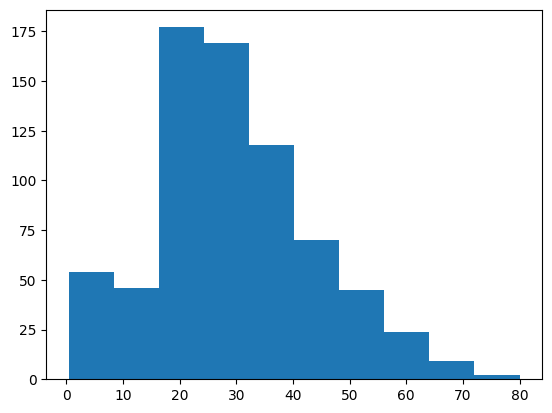

In [17]:
import matplotlib.pyplot as plt
plt.hist(data["Age"])


### Age and Sex

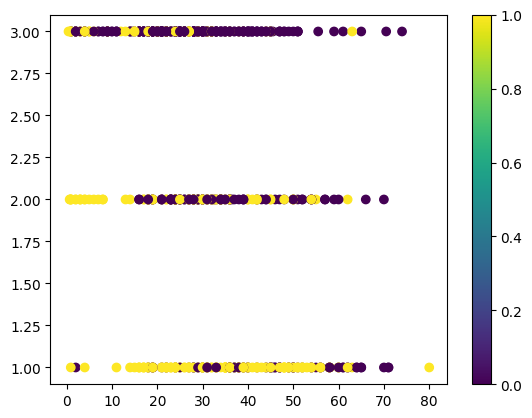

In [18]:
plt.scatter(data["Age"], data["Pclass"], c = data["Survived"], cmap = 'viridis')
plt.colorbar()


### Change Data Type

In [19]:
sexNumber = [1 if x == "male" else 0 for x in data["Sex"]]
print(sexNumber)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 

In [20]:
import numpy as np
data.dropna(subset = ['Age', 'Sex'], inplace = True)

sex = np.array([1 if x == "male" else 0 for x in data["Sex"]])
age = np.array(data["Age"])
survived = np.array(data["Survived"])

print(len(sex))
print(len(age))
print(len(survived))

714
714
714


In [21]:
# normalize between 0 and 1
age = np.array(data["Age"])
age = (age - np.min(age)) / (np.max(age) - np.min(age))
print(pd.DataFrame(age).describe())

                0
count  714.000000
mean     0.367921
std      0.182540
min      0.000000
25%      0.247612
50%      0.346569
75%      0.472229
max      1.000000


### Observation

Sex, Age seems to be the significant information

## Preprocess data

In [22]:
class LossFunction:
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def value(self, a, b, c):
        value_array = self.sigmoid(a * self.x + b * self.y + c)
        loss_values = -self.z * np.log(value_array) - (1 - self.z) * np.log(1 - value_array)
        return np.nansum(loss_values)

    def gradient(self, a, b, c):
        prediction = self.sigmoid(a * self.x + b * self.y + c)
        common_part = - (self.z - prediction)
        return np.array([np.nansum(common_part * self.x), np.nansum(common_part * self.y), np.nansum(common_part)])

    def accuracy(self, a, b, c):
            predictions = self.sigmoid(a * self.x + b * self.y + c)
            predictions = np.array([1 if x > 0.5 else 0 for x in predictions])
            return np.sum(predictions == self.z) / len(self.z)
    

In [23]:
func = LossFunction(sex,age,survived)
print(func.value(1,1,1))
print(sex[5], age[5])

1046.6570117632807
1 0.6732847449107816


Gradient descent process

Iteration 0
Current point: [0.1 0.1 0.1]
Gradient: [160.33401059  43.42007086 102.5995547 ]
Loss value: 521.737560421629
Accuracy: 0.4061624649859944
Iteration 1
Current point: [-0.06033401  0.05657993 -0.00259955]
Gradient: [128.81381598  28.52051033  63.41970856]
Loss value: 488.4683031735085
Accuracy: 0.7703081232492998
Iteration 2
Current point: [-0.18914783  0.02805942 -0.06601926]
Gradient: [105.94977999  17.99213369  35.77560372]
Loss value: 469.54476203664046
Accuracy: 0.5938375350140056
Iteration 3
Current point: [-0.29509761  0.01006729 -0.10179487]
Gradient: [89.55053827 10.69570948 16.64055313]
Loss value: 457.99725095318706
Accuracy: 0.5938375350140056
Iteration 4
Current point: [-0.38464814 -0.00062842 -0.11843542]
Gradient: [77.67232358  5.65366295  3.43931516]
Loss value: 450.25795477874954
Accuracy: 0.5938375350140056
Iteration 5
Current point: [-0.46232047 -0.00628209 -0.12187474]
Gradient: [68.91046165  2.16430913 -5.67312646]
Loss value: 444.54832997140034
Accuracy:

array([-2.2630657 ,  0.09301384,  0.93323276])

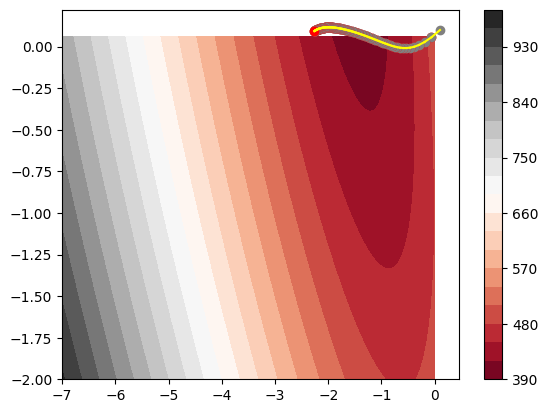

In [24]:
def gradient_descent_process(starting_point, learning_rate, iterations):

    # clear the graphs folder
    import os
    import shutil
    shutil.rmtree('./graphs')
    os.mkdir('./graphs')

    x = np.linspace(-7, 0.001, 100)
    y = np.linspace(-2, 0.06, 100)
    X, Y = np.meshgrid(x, y)
    Z = [[func.value(x, y, 0.0012) for x in x] for y in y]

    plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
    plt.colorbar()
    
    cur_point = starting_point
    for i in range(iterations):
        gradient = func.gradient(cur_point[0], cur_point[1], cur_point[2])
        print("Iteration {id}".format(id = i))
        print("Current point: {point}".format(point = cur_point))
        print("Gradient: {grad}".format(grad = gradient))
        print("Loss value: {loss}".format(loss = func.value(cur_point[0], cur_point[1], cur_point[2])))
        print("Accuracy: {acc}".format(acc = func.accuracy(cur_point[0], cur_point[1], cur_point[2])))
        print("====================================")
        next_point = cur_point - gradient * learning_rate
        # plot the current point as grey point, the new point as red
        plt.scatter(cur_point[0], cur_point[1], c = 'grey')
        plt.scatter(next_point[0], next_point[1], c = 'red')
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], c = 'yellow')
        plt.savefig('./graphs/iteration_{id}.png'.format(id = i))

        cur_point = next_point

        if (np.linalg.norm(gradient) < 0.00001):
            break

    return cur_point


starting_point = np.array([0.1, 0.1, 0.1])
learning_rate = 0.001
iterations = 100
gradient_descent_process(starting_point, learning_rate, iterations)

In [25]:
import imageio.v2 as imageio
images = []
for i in range(iterations - 1):
    filename = './graphs/iteration_'+ str(i) + '.png'
    images.append(imageio.imread(filename))
imageio.mimsave('./graph.gif', images, duration=100)

In [ ]:
#Implement sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(5)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
